In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

: 

Import et vérif de la data

In [2]:
df = pd.read_csv('prix_maisons.csv')
display(df.head())
print(f"Il y a {df.shape[0]} lignes.\n")
print("Y a-t-il des nan dans la data ?")
display(pd.isna(df).any())

,taille,n_chambres,n_salle_de_bain,prix
0,84,1,1,43.747
1,45,4,1,30.100
2,73,1,3,39.481
3,34,2,3,23.908
4,31,4,3,24.144


Il y a 99 lignes.

Y a-t-il des nan dans la data ?


taille             False
n_chambres         False
n_salle_de_bain    False
prix               False
dtype: bool

Séparation `input` et `output`

In [3]:
x = df.drop("prix", axis=1).values  # axis = 1 car prix est un colonne
y = df["prix"].values.reshape(-1, 1)  # on veut que y.shape=(99, 1) et non pas (99,). On aurait pu faire reshape(99,1)

In [4]:
print(f"{x.shape=} et {y.shape=}")

x.shape=(99, 3) et y.shape=(99, 1)


Préparation pour l'algo

!! Le feature scaling doit être fait indépendamment sur le training_set et le test_set, 

car sinon, on a de l' `information leakage` depuis le test vers le train !! 

Dans ce cas ci, on ne sépare pas la data, donc cette remarque ne s'applique pas

In [5]:
x_min = np.min(x, axis=0)
x_max = np.max(x, axis=0)
x_range = x_max - x_min


print(f"{x_min=}")
print(f"{x_max=}")
print(f"{x_range=}")


x_min=array([30,  1,  1])
x_max=array([99,  4,  3])
x_range=array([69,  3,  2])


In [6]:
x_norm = (x - x_min) / x_range 
n_lignes = 4
print(f"Les {n_lignes} premières lignes de x sont\n {x[:n_lignes,]}")
print(f"Les {n_lignes} premières lignes de x_norm sont\n {x_norm[:n_lignes,]}")

Les 4 premières lignes de x sont
 [[84  1  1]
 [45  4  1]
 [73  1  3]
 [34  2  3]]
Les 4 premières lignes de x_norm sont
 [[0.7826087  0.         0.        ]
 [0.2173913  1.         0.        ]
 [0.62318841 0.         1.        ]
 [0.05797101 0.33333333 1.        ]]


!! On ne fait pas de feature scaling sur les biais !!

In [7]:
# ajout des biais
bias = np.ones((len(x_norm), 1))
X = np.concatenate((bias, x_norm), axis = 1)
print(f"Les 10 premières lignes de X sont\n {X[:10,]} \n et on a {X.shape=}")

Les 10 premières lignes de X sont
 [[1.         0.7826087  0.         0.        ]
 [1.         0.2173913  1.         0.        ]
 [1.         0.62318841 0.         1.        ]
 [1.         0.05797101 0.33333333 1.        ]
 [1.         0.01449275 1.         1.        ]
 [1.         0.01449275 0.66666667 0.5       ]
 [1.         0.88405797 1.         1.        ]
 [1.         0.05797101 0.66666667 0.5       ]
 [1.         0.05797101 1.         0.        ]
 [1.         0.71014493 0.66666667 1.        ]] 
 et on a X.shape=(99, 4)


On initialise theta,

$\theta = \begin{bmatrix}\epsilon_0 \\\\ \epsilon_1 \\\\ \epsilon_2 \\\\\epsilon_3\end{bmatrix}$ et on fera $Y = X\cdot \theta$

In [8]:
eps=10**-2
theta = eps * np.random.random((X.shape[1],1))
print(theta)
print(theta.shape)

[[0.00147453]
 [0.00140052]
 [0.00100311]
 [0.0079945 ]]
(4, 1)


In [9]:
print(f"Notons que dim(X)={tuple(X.shape)} et dim(θ)={tuple(theta.shape)}, qui sont compatibles pour la multiplication, et qui nous donnent dim(Y)=({X.shape[0]}, {theta.shape[1]})")

Notons que dim(X)=(99, 4) et dim(θ)=(4, 1), qui sont compatibles pour la multiplication, et qui nous donnent dim(Y)=(99, 1)


## Optimisation

![cout](cout.png "Fonction coût")
![partielle](partielle.png "Utilisation de la érivée partielle dans la descente de gradient")


dérivées partielle de la Fonction coût : 

$\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum(f(\theta) - y)x_j$ pour $j=0,1,..,3$ 

Gradient :

$\nabla J = [\frac{\partial J}{\partial \theta_0},...,\frac{\partial J}{\partial \theta_3}]$


In [11]:
m = len(y)

def grad(theta):
    dJ = (1/m) * np.sum( (X @ theta - y) * X, axis=0).reshape(-1,1)
    return dJ

def cost(theta):
    J = np.sum((X @ theta - y)**2,axis=0)[0]
    return J

In [12]:
# Si on avait 5 lignes, la fonction grad ferait : 
print((X @ theta - y)[:5])
print(X[:5])
print((X @ theta - y)[:5] * X[:5])
print(np.sum((X @ theta - y)[:5] * X[:5], axis=0))


[[-43.74632768]
 [-30.09244307]
 [-39.47746261]
 [-23.90245996]
 [-24.13361171]]
[[1.         0.7826087  0.         0.        ]
 [1.         0.2173913  1.         0.        ]
 [1.         0.62318841 0.         1.        ]
 [1.         0.05797101 0.33333333 1.        ]
 [1.         0.01449275 1.         1.        ]]
[[-43.74632768 -34.23625645  -0.          -0.        ]
 [-30.09244307  -6.54183545 -30.09244307  -0.        ]
 [-39.47746261 -24.60189699  -0.         -39.47746261]
 [-23.90245996  -1.38564985  -7.96748665 -23.90245996]
 [-24.13361171  -0.34976249 -24.13361171 -24.13361171]]
[-161.35230502  -67.11540122  -62.19354143  -87.51353427]


In [13]:
# et pour la fonction coût
print((X @ theta - y)[:5])
print((X @ theta - y)[:5]**2)
print(np.sum((X @ theta - y)[:5]**2,axis=0))


[[-43.74632768]
 [-30.09244307]
 [-39.47746261]
 [-23.90245996]
 [-24.13361171]]
[[1913.7411855 ]
 [ 905.55512976]
 [1558.47005377]
 [ 571.32759202]
 [ 582.4312142 ]]
[5531.52517525]


Descente de gradient : à la i-ième itération : 

$\theta^{i+1} = \theta^i - \alpha\times\nabla J(\theta^i)$

In [14]:
from typing import Tuple, List


def gradient_descent(theta, learning_rate=0.5,epochs=1000,TOL=1e-7) :
    theta0 = theta.copy()
    theta_history = [theta0]
    J_history = [cost(theta0)]
    
    #thetanew = theta0*10000
    print(f'epoch \t Cost(J) \t')
    for epoch in range(epochs):
        if epoch%100 == 0:
            print(f'{epoch:5d}\t {J_history[-1]:7.4f}\t')
        dJ = grad(theta0)
        J = cost(theta0)
        
        thetanew = theta0 - learning_rate*dJ
        theta_history.append(thetanew)
        J_history.append(J)
        
        if np.sum((thetanew - theta0)**2) < TOL:
            break
        theta0 = thetanew

    return thetanew, theta_history, J_history

In [15]:
# ON peut utiliser différentes stratégies pour initialiser theta 

# theta = eps * np.random.random((X.shape[1],1))
# theta = 0 * np.random.random((X.shape[1],1))
# theta = np.mean(y) * np.ones((X.shape[1],1))

best_theta,theta_history,J_history = gradient_descent(theta)

epoch 	 Cost(J) 	
    0	 157282.9767	
  100	 77.6860	
  200	 73.7984	


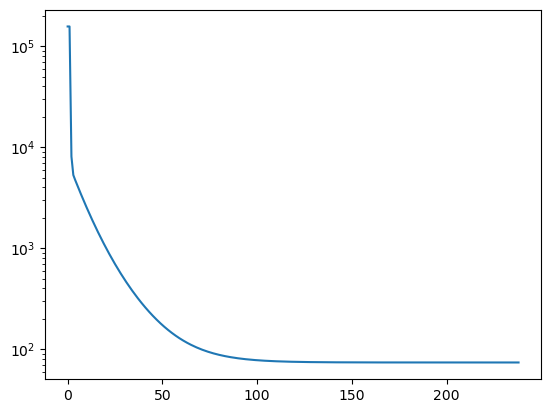

In [16]:
plt.yscale('log')
plt.plot(J_history)

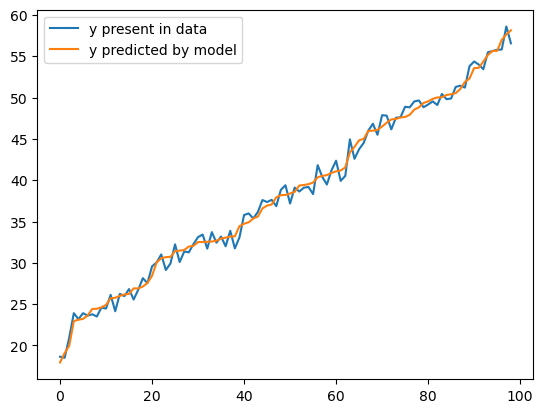

In [17]:

ypred = X @ best_theta
sortidx = np.argsort(ypred[:,0])
plt.plot(y[sortidx,0],label='y present in data')
plt.plot(ypred[sortidx,0], label='y predicted by model')
plt.legend()

In [18]:
def prediction_de_prix(taille: int, n_chambres: int, n_salle_de_bain: int) -> float:
    x = np.array([1, taille, n_chambres, n_salle_de_bain])
    x_min = np.min(x, axis=0)
    x_max = np.max(x, axis=0)
    x_range = x_max - x_min
    x_norm = (x - x_min) / x_range
    y_pred = x_norm @ best_theta 
    return y_pred[0]
     

Vérification de la cohérence des résultats

In [19]:
taille = 50
print(f"{prediction_de_prix(taille=taille, n_chambres=4, n_salle_de_bain=1)=:.3f}")
display(df.query(f"@taille - 1 < taille < @taille + 1"))

prediction_de_prix(taille=taille, n_chambres=4, n_salle_de_bain=1)=34.732


,taille,n_chambres,n_salle_de_bain,prix
13,50,3,2,33.714
53,50,2,2,31.019
94,50,3,3,31.748


Evaluation statistique du modèle

In [20]:
from scipy.stats import pearsonr

pearsonr(ypred.reshape(-1), y.reshape(-1))

PearsonRResult(statistic=0.9964938689344864, pvalue=2.489381963657087e-106)

NB : The P-value is the probability that you would have found the current result if the correlation coefficient were in fact zero